In [58]:
from shapely import *
import shapely as shp
import matplotlib.pyplot as plt

In [ ]:
# split room into points, create cells around each points, and determine the adjacency of these cells 

# create a room 
# create offset curve to describe surroundings, and make it into a polygon 
# use numpy to make a mesh of points that are evenly distributed 
# use buffer to create cells based on these points and the overlap/ intersection with the polygons 
# give cells properties based on their relation to the room/surroundings...
# use str tree thing to identify neighbours of each cell 

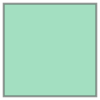

In [6]:
room_dim = 10
room = Polygon([[0, 0], [room_dim, 0], [room_dim, room_dim], [0, room_dim], [0, 0]])
room

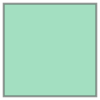

In [7]:
outside_dim = 20 
ambient = Polygon([[0, 0], [outside_dim, 0], [outside_dim, outside_dim], [0, outside_dim], [0, 0]])
ambient

In [67]:
ambient.contains(room)

True

In [16]:
list(ambient.centroid.coords)

[(10.0, 10.0)]

In [110]:
ambient.centroid.xy

(array('d', [10.0]), array('d', [10.0]))

In [26]:
list(room.centroid.coords)

[(5.0, 5.0)]

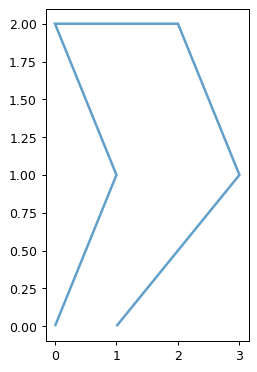

In [59]:
fig = plt.figure(1,  dpi=90)
ax = fig.add_subplot(121)
line = LineString([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
shp.plotting.plot_line(line, ax=ax, add_points=False, alpha=0.7)

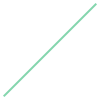

In [25]:
line = LineString([(0, 0), (1, 1)])
line

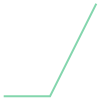

In [28]:
LineString([Point(0.0, 1.0), (2.0, 1.0), Point(4.0, 5.0)])

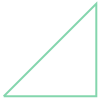

In [30]:
ring = LinearRing([(0, 0), (1, 1), (1, 0)])
ring

((0.0, 1.0),)

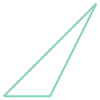

In [37]:
LinearRing([list(Point(0.0, 1.0).coords)[0],(2.0, 1.0), list(Point(4.0, 5.0).coords)[0]])

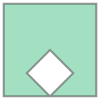

In [39]:
# 1: valid polygon
ax = fig.add_subplot(121)

ext = [(0, 0), (0, 2), (2, 2), (2, 0), (0, 0)]
int = [(1, 0), (0.5, 0.5), (1, 1), (1.5, 0.5), (1, 0)][::-1]
polygon = Polygon(ext, [int])

polygon


In [46]:
list(polygon.interiors)

[<LINEARRING (1 0, 1.5 0.5, 1 1, 0.5 0.5, 1 0)>]

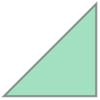

In [47]:
coords = [(0, 0), (1, 1), (1, 0)]
r = LinearRing(coords)
s = Polygon(r)
s

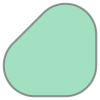

In [48]:
s.buffer(1.0)

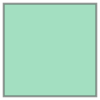

In [49]:
b = box(0.0, 0.0, 1.0, 1.0)
b

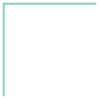

In [50]:
ip = LineString([(0, 0), (0, 1), (1, 1)])
ip

In [54]:
m = ip.interpolate(1.5)
list(m.coords)

[(0.5, 1.0)]

In [63]:
from functools import wraps
def validate(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        ob = func(*args, **kwargs)
        if not ob.is_valid:
            raise Error(
                "Given arguments do not determine a valid geometric object")
        return ob
    return wrapper

In [65]:
@validate  
def ring(coordinates):
    return LinearRing(coordinates)

In [66]:
# coords = [(0, 0), (1, 1), (1, -1), (0, 1)]
# ring(coords) 

NameError: name 'Error' is not defined

In [68]:
p = Point(4.0, 5.0)

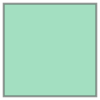

In [72]:
p2 = p.buffer(0.5, cap_style=3,)
p2

In [79]:
list(p2.boundary.coords)

[(4.5, 5.5), (4.5, 4.5), (3.5, 4.5), (3.5, 5.5), (4.5, 5.5)]

In [76]:
p2.geom_type

'Polygon'

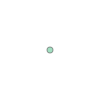

In [81]:
Point(0, 0).envelope
# MultiPoint([(0, 0), (1, 1)]).envelope


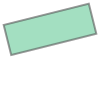

In [83]:
a = MultiPoint([(0,0),(1,1),(2,0.5)]).minimum_rotated_rectangle
a

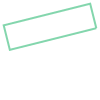

In [89]:
a.boundary.offset_curve(0.1)

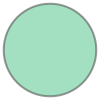

In [90]:
p = Point(1, 1).buffer(1.5)
p

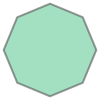

In [91]:
q = p.simplify(0.2)
q

In [93]:
lines = [
    ((0, 0), (1, 1)),
    ((0, 0), (0, 1)),
    ((0, 1), (1, 1)),
    ((1, 1), (1, 0)),
    ((1, 0), (0, 0)),
    ((5, 5), (6, 6)),
    ((1, 1), (100, 100)),
    ]
result, cuts, dangles, invalids = polygonize_full(lines)

TypeError: One of the arguments is of incorrect type. Please provide only Geometry objects.

In [98]:
from shapely.ops import *

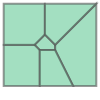

In [97]:
points = MultiPoint([(0, 0), (1, 1), (0, 2), (2, 2), (3, 1), (1, 0)])
regions = voronoi_diagram(points)
regions

In [99]:
square = Polygon([(1,1), (2, 1), (2, 2), (1, 2), (1, 1)])
line = LineString([(0,0), (0.8, 0.8), (1.8, 0.95), (2.6, 0.5)])

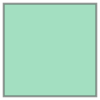

In [101]:
square

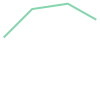

In [102]:
line

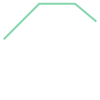

In [100]:
result = snap(line, square, 0.5)
result

In [103]:
g1 = LineString([(0, 0), (10, 0), (10, 5), (20, 5)])
g2 = LineString([(5, 0), (30, 0), (30, 5), (0, 5)])
forward, backward = shared_paths(g1, g2).geoms

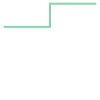

In [105]:
g1

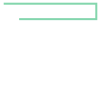

In [106]:
g2

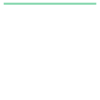

In [104]:
forward

In [107]:
points = [Point(i, i) for i in range(10)]
tree = STRtree(points)
query_geom = Point(2,2).buffer(0.99) #

In [108]:
points

[<POINT (0 0)>,
 <POINT (1 1)>,
 <POINT (2 2)>,
 <POINT (3 3)>,
 <POINT (4 4)>,
 <POINT (5 5)>,
 <POINT (6 6)>,
 <POINT (7 7)>,
 <POINT (8 8)>,
 <POINT (9 9)>]

In [109]:
[points[idx].wkt for idx in tree.query(query_geom)]

['POINT (2 2)']